#**HW 3: Convolutional Neural Networks**

In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the Fashion Minst dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
### Load Data: Fashion MNIST dataset

We will use the Fashion MNIST dataset, a dataset of Zalando's articles. Each sample is a 28x28 pixels grayscale image, associated with a label from 10 classes:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Each pixel intensity is represented by a uint8 (byte) from 0 to 255.
We will divide the dataset in training, validation and test set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of the deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one). Therefore we use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims) to transform each image from a matrix to a 3-dimensional tensor. Finaly we have to normalize the input data.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = (fashion_mnist.load_data()) #The dataset is already divede in test and training..

#We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


4423680/4422102 [==============================] - 0s 0us/step


Let's take a look at a sample of the images in the dataset:

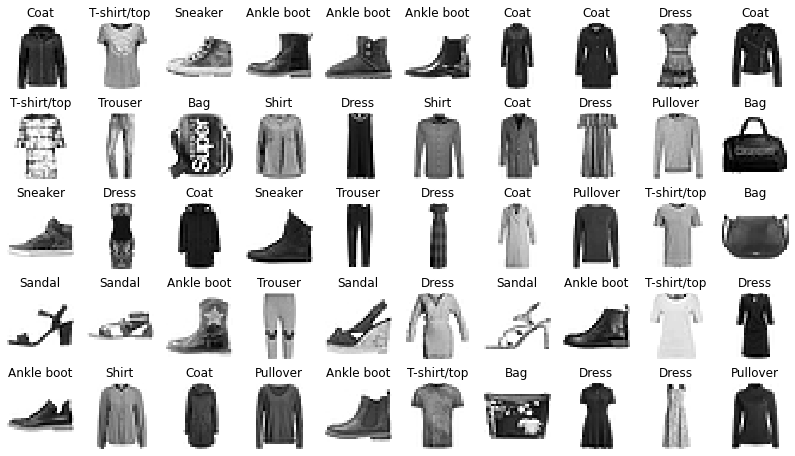

In [ ]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols*1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.show()

### Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

In [ ]:
#define X_train_scaled, X_valid_scaled and X_test_scaled, the sets that contains 
#For each feature (pixel intensity), you must subtract the mean() of that 
#feature (across all instances, so use axis=0) and divide by its standard 
#deviation (std(), again axis=0)

mean_train=X_train.mean(0)
std_train=X_train.std(0)
X_train = (X_train-mean_train)/std_train#[TO COMPLETE]
X_valid = (X_valid-mean_train)/std_train#[TO COMPLETE]
X_test = (X_test-mean_train)/std_train#[TO COMPLETE]

#Add one dimension to manage the channel
X_train=tf.expand_dims(X_train, 3) 
X_valid=tf.expand_dims(X_valid, 3) 
X_test=tf.expand_dims(X_test,3)

#Make sure you compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the
#test set

###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])


Print the model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
430/430 [==============================] - 22s 49ms/step - loss: 1.0290 - accuracy: 0.6789 - val_loss: 0.5271 - val_accuracy: 0.8206
Epoch 2/10
430/430 [==============================] - 21s 48ms/step - loss: 0.4996 - accuracy: 0.8293 - val_loss: 0.4522 - val_accuracy: 0.8498
Epoch 3/10
430/430 [==============================] - 21s 48ms/step - loss: 0.4363 - accuracy: 0.8527 - val_loss: 0.4060 - val_accuracy: 0.8658
Epoch 4/10
430/430 [==============================] - 21s 49ms/step - loss: 0.3997 - accuracy: 0.8622 - val_loss: 0.3906 - val_accuracy: 0.8724
Epoch 5/10
430/430 [==============================] - 21s 49ms/step - loss: 0.3754 - accuracy: 0.8703 - val_loss: 0.3737 - val_accuracy: 0.8748
Epoch 6/10
430/430 [==============================] - 21s 49ms/step - loss: 0.3617 - accuracy: 0.8726 - val_loss: 0.3638 - val_accuracy: 0.8778
Epoch 7/10
430/430 [==============================] - 21s 49ms/step - loss: 0.3572 - accuracy: 0.8779 - val_loss: 0.3564 - val_accuracy:

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 1s - loss: 0.3594 - accuracy: 0.8743
accuracy: 87.43%


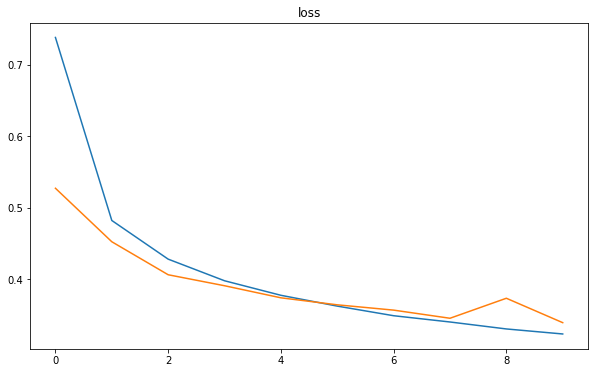

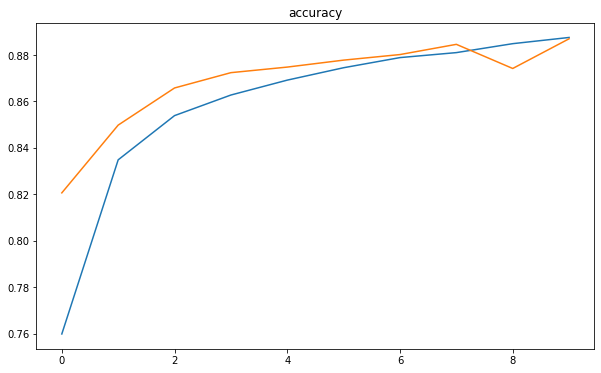

In [ ]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'])
  plt.plot(history.epoch,history.history['val_loss'])
  plt.title('loss')

def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'])
  plt.plot(history.epoch,history.history['val_accuracy'])
  plt.title('accuracy')

plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

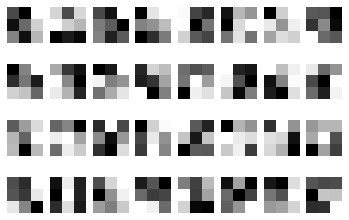

In [ ]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 16)        2064      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5770      
Total params: 8,154
Trainable params: 8,154
Non-trainable params: 0
____________________________________________________

Explain in this cell: 

1.   how the number of parameters on each of the two Conv2D layers is determined;
2.   the reasons why the two considered convolutional layers have a different number of parameters.

Answers:


1.   The number_parameters of each convolutional layer is determined by the formula below:
<br>number_parameters  = out_channels * (in_channels * kernel_h * kernel_w + 1) 
<br> +1 is for the bias.

 So in our case: <br>
 First Conv2d layer: 32 * (1*3*3 + 1)=320 <br>
 Second Conv2d layer: 16 * (32*2*2+1)=2064
2.   As we can see by the formula above in the first Conv2D layers we have as input the image that have an input size of (28,28,1) so we just have to apply the convolution over our 1 "feature map".
On the other hand after the first layer of convolution we have 32 feature map (generated by our 32 filters) so for the second Conv2D layers we have in input 32 different channels/"feature maps" (not only one as before) and despite the smaller kernel size we have more parameters. 

Let's now train our deep CNN.

Epoch 1/10
430/430 [==============================] - 24s 54ms/step - loss: 1.4799 - accuracy: 0.5049 - val_loss: 0.6686 - val_accuracy: 0.7694
Epoch 2/10
430/430 [==============================] - 23s 54ms/step - loss: 0.6316 - accuracy: 0.7713 - val_loss: 0.5471 - val_accuracy: 0.8130
Epoch 3/10
430/430 [==============================] - 23s 54ms/step - loss: 0.5477 - accuracy: 0.8044 - val_loss: 0.4918 - val_accuracy: 0.8320
Epoch 4/10
430/430 [==============================] - 24s 55ms/step - loss: 0.4935 - accuracy: 0.8234 - val_loss: 0.4652 - val_accuracy: 0.8426
Epoch 5/10
430/430 [==============================] - 24s 55ms/step - loss: 0.4615 - accuracy: 0.8383 - val_loss: 0.4671 - val_accuracy: 0.8310
Epoch 6/10
430/430 [==============================] - 24s 55ms/step - loss: 0.4375 - accuracy: 0.8473 - val_loss: 0.4230 - val_accuracy: 0.8558
Epoch 7/10
430/430 [==============================] - 24s 55ms/step - loss: 0.4258 - accuracy: 0.8512 - val_loss: 0.4285 - val_accuracy:

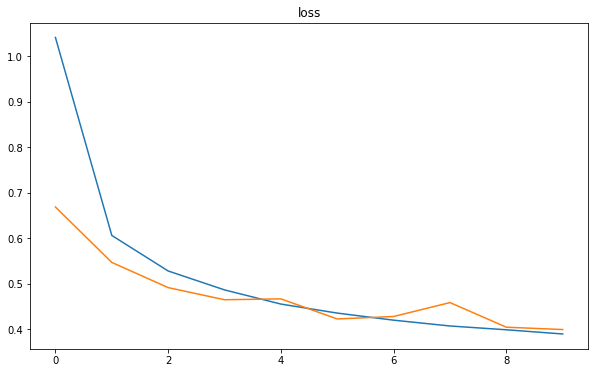

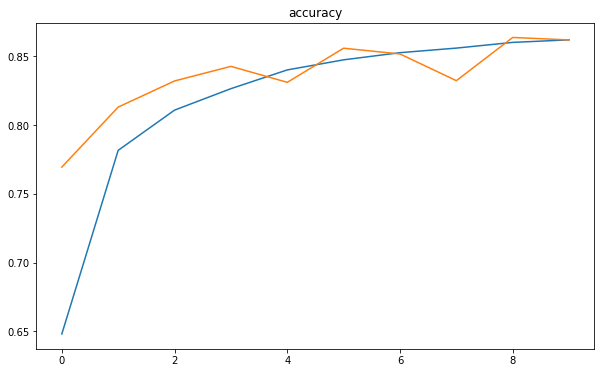

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

The goal is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

In [ ]:
#[MODEL 1]
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[28, 28,1]),
    keras.layers.Conv2D(filters=32, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 25, 25, 32)        4128      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                46090     
Total params: 50,538
Trainable params: 50,538
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/10
430/430 [==============================] - 47s 108ms/step - loss: 0.6821 - accuracy: 0.7707 - val_loss: 0.3466 - val_accuracy: 0.8794
Epoch 2/10
430/430 [==============================] - 46s 108ms/step - loss: 0.3329 - accuracy: 0.8847 - val_loss: 0.3167 - val_accuracy: 0.8918
Epoch 3/10
430/430 [==============================] - 46s 108ms/step - loss: 0.2783 - accuracy: 0.9000 - val_loss: 0.2893 - val_accuracy: 0.8980
Epoch 4/10
430/430 [==============================] - 46s 107ms/step - loss: 0.2427 - accuracy: 0.9149 - val_loss: 0.2684 - val_accuracy: 0.9090
Epoch 5/10
430/430 [==============================] - 46s 107ms/step - loss: 0.2181 - accuracy: 0.9214 - val_loss: 0.2678 - val_accuracy: 0.9064
Epoch 6/10
430/430 [==============================] - 46s 107ms/step - loss: 0.1979 - accuracy: 0.9292 - val_loss: 0.2545 - val_accuracy: 0.9098
Epoch 7/10
430/430 [==============================] - 46s 106ms/step - loss: 0.1914 - accuracy: 0.9298 - val_loss: 0.2539 - val_ac

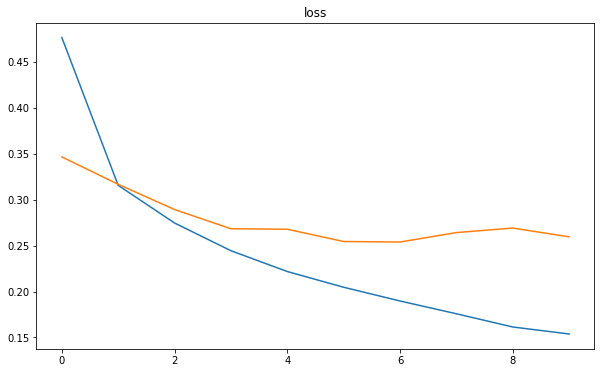

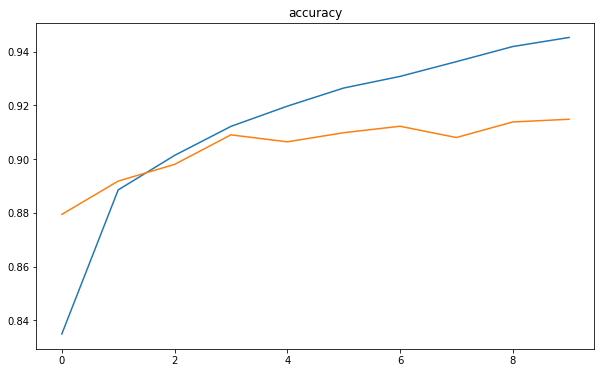

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

313/313 - 3s - loss: 0.2812 - accuracy: 0.9124
accuracy: 91.24%


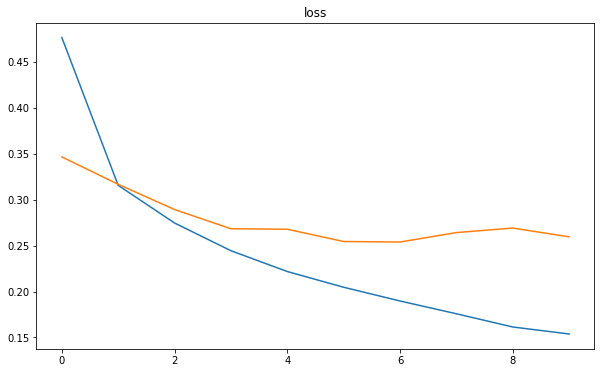

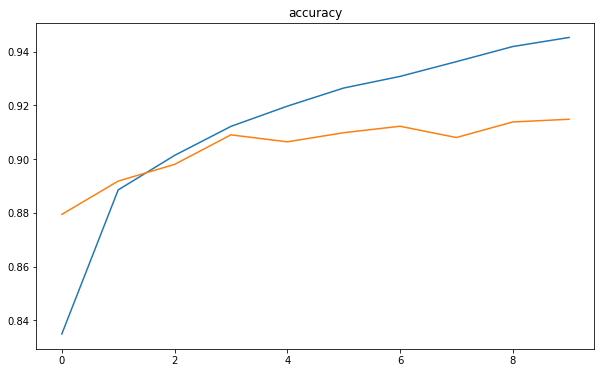

In [ ]:
plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

### Example of tests discussion
The BEST MODEL that I found is the one composed by:
<br>the network of the professor with some changes:
<br>I remove the first MaxPool Layer
<br>I increase the number of filter on the second convolutional layer(filters=32, kernel_size=[2,2], activation='relu').
<br> I change the optimizer from sgd to adam
<br> I leave the same number of epochs=10
<br> the same batch_size=128
<br> (We can see It's summary above)

The achieved ACCURACY in the test set is: 91.24% ,  loss: 0.2812

Discussion:
To create this model I try to mix some characteristics of previous models that I testes that allow me to reach better performances compared to the one created in the step before (the one given by the professor).
So first of all I used Adam as optimizer (Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments).
Then I decide to remove the first max-pooling layer and using 2 convolutional layers: 
First one: (filters=32, kernel_size=[3,3], activation='relu').
Second one: (filters=32, kernel_size=[2,2], activation='relu').
I decide to use 10 epochs because this allow me to get a result in a reasonable time and also allow me to prevent overfitting.
This model have more params than all the other one that I tested.
<br>Total params: 50,538
<br>Trainable params: 50,538
<br>Non-trainable params: 0


Besides, I tested also other models:

* MODEL 1 - I start from the network of the professor and I change:
<br> I change the kernel size of the second convolutional layer to kernel_size=[3,3]. (followed by a max-pooling layer)
<br>I add another convlutional layer (filters=16, kernel_size=[3,3], activation='relu')
(followed by a Max-Pooling (pool_size=(2,2))).
<br>optimizer: sgd
<br>epochs=10
<br>batch_size=128
<br>RESULTS on test set:
<br>loss: 0.5516 - accuracy: 80.75%


* MODEL 2 - I start from the network of the professor and I change:
<br>Activation Function : Selu 
<br>Number of filters on the second convolutional layer increased from 16 to 32.
<br>RESULTS on test set:
<br>loss: 0.3832 - accuracy: 86.76%

* MODEL 3 - I start from the network of the professor and I change: <br>optimizer: Adam
<br>epochs: 20
<br>batch size: 64
<br>RESULTS on test set:
<br>loss: 0.3071 - accuracy: 89.77%

* MODEL 4 - I start from the network of the professor and I change:
<br>I add a Convolutional layer: (filters=32, kernel_size=[3,3], activation='relu').
<br>And I add a MaxPool Layer after it (pool_size=(2,2)).
<br> both of them between the 2 convolutional layer that we had in the network before.
<br>optimizer: Adam
<br>epochs: 10
<br>batch size: 64
<br>RESULTS on test set:
<br>loss: 0.3567 - accuracy: 87.47%

* MODEL 5 - I start from the network of the professor and I change:
<br>I remove the first MaxPool Layer
<br>optimizer: Adam
<br>epochs: 15
<br>batch size: 64
<br>RESULTS on test set:
<br>loss: 0.3439 - accuracy 89.90%


* MODEL 6 - I start from the network of the professor and I change:
<br>I remove the first MaxPool Layer
<br>I increase the number of filter on the second convolutional layer and the kernel size (filters=32, kernel_size=[3,3], activation='relu').
<br>optimizer: sgd
<br>epochs=10
<br>batch_size=128
<br>RESULTS on test set:
<br>loss: 0.3666 - accuracy: 87.39%

* MODEL 7 - I start from the network of the professor and I change:
<br>I remove the first MaxPool Layer
<br>I use 3 Convolutional layers with: (filters=32, kernel_size=[3,3], activation='elu').
<br>Activation Function: elu
<br>optimizer: Adam
<br>epochs=15
<br>batch_size=128
<br>RESULTS on test set:
<br>loss: 0.2969 - accuracy: 90.14%


Discussion:
I tested different models in which I changed some of These parameters:
* number of layers or neurons or filters dimension
* activation functions
* epochs
* batch sizes
* optimizer
* max-pooling on/off on certain layers, or pool size

I mix some different changes, that I have noticed to work well, trying to get a better model.
I notice that by removing the first max-pooling I get obviously more parameters and they allow me to reach good performance but with too much epochs I get overfitting so I kept them 10.
Another important parameter that change a lot performance is the optimizer that allow me with the same model as the one create by the professor (with more epochs) to get really better performances.
I also compare different value of activation function but the one that gives me better and also faster results is relu.
I try to increment the number of Convolutional layers followed by max-pooling but I get worst performances. 